In [2]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress


In [3]:
happy_df2015 = pd.read_csv('Resources/2015.csv')

print(list(happy_df2015.columns))
happy_df2015

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
obesity_path = 'obesity.csv'
obesity_df = pd.read_csv(obesity_path)
columnheaders = list(obesity_df.columns.values)
print(columnheaders)
obesity_df = obesity_df[['Location', 'FactValueNumeric','Period', 'Dim1ValueCode' ]]
obesity_df = obesity_df.loc[obesity_df['Period'] ==2015]
obesity_df = obesity_df.loc[obesity_df['Dim1ValueCode'] =="BTSX"]
obesity_df = obesity_df.rename(columns={"Location":"Country", "Period": "Year", "Dim1ValueCode":"SEX"})


obesity_df

['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode', 'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location', 'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified']


,Country,FactValueNumeric,Year,SEX
593,Mauritius,10.5,2015,BTSX
594,Ghana,10.5,2015,BTSX
599,Cameroon,11.0,2015,BTSX
603,Cabo Verde,11.4,2015,BTSX
613,Sao Tome and Principe,12.0,2015,BTSX
...,...,...,...,...
1157,Gambia,9.9,2015,BTSX
1158,Monaco,NaN,2015,BTSX
1161,San Marino,NaN,2015,BTSX
1164,South Sudan,NaN,2015,BTSX


In [6]:
# merge the cells
happy_obese = pd.merge(happy_df2015, obesity_df , on="Country", how ="left")
happy_obese = happy_obese.dropna()
happy_obese

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,FactValueNumeric,Year,SEX
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,19.1,2015.0,BTSX
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,21.5,2015.0,BTSX
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,19.3,2015.0,BTSX
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,22.6,2015.0,BTSX
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,28.8,2015.0,BTSX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,5.2,2015.0,BTSX
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,5.6,2015.0,BTSX
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,9.3,2015.0,BTSX
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,5.1,2015.0,BTSX


Text(0, 0.5, 'Happiness Score')

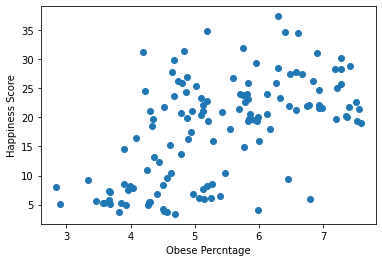

In [7]:
x_axis = happy_obese["Happiness Score"]
y_axis = happy_obese["FactValueNumeric"]

#Plotting scatter plot for Happiness Rank vs. FactValueNumeric
plt.scatter(x_axis,y_axis)
plt.xlabel('Obese Percntage')
plt.ylabel('Happiness Score')

The correlation value is 0.57
The r-squared is: 0.3257015669416551


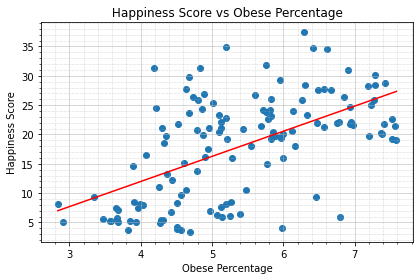

In [10]:

# Print out the r-squared value along with the plot.
x_values =  happy_obese["Happiness Score"]
y_values = happy_obese["FactValueNumeric"]
corr = round(st.pearsonr(x_values,y_values)[0],2)
print(f"The correlation value is {corr}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
#print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.title(' Happiness Score vs Obese Percentage ')
plt.xlabel('Obese Percentage')
plt.ylabel('Happiness Score')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
#plt.xlim(-60,85)
plt.tight_layout()
#plot
plt.savefig('Images/happiness_vs_obesity')
plt.show()